In [1]:
import pandas as pd
MyList=[]
ChunkSize=10000
for chunk in pd.read_json(r"C:\Users\aiman\Downloads\wsbData.json",lines=True,chunksize=ChunkSize):
    MyList.append(chunk)

In [2]:
df=pd.concat(MyList,axis=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979131 entries, 0 to 2979130
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   body                    object 
 1   score_hidden            object 
 2   archived                object 
 3   name                    object 
 4   author                  object 
 5   downs                   float64
 6   created_utc             int64  
 7   subreddit_id            object 
 8   link_id                 object 
 9   parent_id               object 
 10  score                   int64  
 11  retrieved_on            float64
 12  controversiality        int64  
 13  gilded                  int64  
 14  id                      object 
 15  subreddit               object 
 16  ups                     float64
 17  author_flair_text       object 
 18  author_flair_css_class  object 
 19  distinguished           object 
dtypes: float64(3), int64(4), object(13)
memory usage: 454.6+ MB


In [4]:
df= df.drop(df[(df['body'] =='[deleted]') ].index)
df= df.drop(df[(df['body'] =='[removed]') ].index)

In [5]:
print(len(df))

2684416


In [6]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words("english"))
def cleanTxt(text):

    #Removing @ mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #Removing numbers
    text = re.sub(r'\d+', '', text)
    #Removing hashtags
    text=re.sub(r'#','',text)
    #Removing the hyper-links
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'http?:\/\/\S+','',text)
    
    #Smaller case
    text=text.lower()
    #Removing punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    text=text.translate(translator)
    #Removing white spaces
    text=" ".join(text.split())
    '''
    #Remove stopwords
    word_tokens=word_tokenize(text)
    filtered_text=[word for word in word_tokens if word not in stop_words]
    text=" ".join(filtered_text)
    '''
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\ndef textPreprocessing(df):\n    """\n    text Preprocessing method does the preprocessing needed for the wallStreet bets dataset.\n    :param df: the dataframe chunck from wallStreet bets dataset.\n    :return: has no return.\n    """\n    # step 1: extracting the necessary columns:\n    df_comments=pd.DataFrame(df[\'body\'])\n    # Dropping all deleted comments\n    df_comments= df_comments.drop(df_comments[(df_comments[\'body\'] ==\'[deleted]\') ].index)\n    df_comments= df_comments.drop(df_comments[(df_comments[\'body\'] ==\'[removed]\') ].index)\n    # text cleaning\n    df_comments[\'body\']=df_comments[\'body\'].apply(cleanTxt)\n    df_comments=df_comments.dropna()\n    return df_comments\n'

In [7]:
df['body']=df['body'].apply(cleanTxt)

In [8]:
df.dropna()

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished
841132,is this real serious edit it shows the days lo...,0.0,0.0,t1_cue7f6v,theycallme1,0.0,1440443751,t5_2th52,t3_3i8auj,t3_3i8auj,13,1.441446e+09,0,0,cue7f6v,wallstreetbets,13.0,BGMDildo Manufacturer,blue,moderator
858146,addendum plot ways to ruin daisys life drink w...,0.0,0.0,t1_cuh19uv,theycallme1,0.0,1440642650,t5_2th52,t3_3ij45m,t1_cugwlcp,4,1.441521e+09,0,0,cuh19uv,wallstreetbets,4.0,BGMDildo Manufacturer,blue,moderator
879002,hey d bag look at his fucking post history get...,0.0,0.0,t1_cule041,theycallme1,0.0,1440986922,t5_2th52,t3_3iw7us,t1_cul9e1c,7,1.441598e+09,0,0,cule041,wallstreetbets,7.0,BGMDildo Manufacturer,blue,moderator
898579,i dont give a fuck about watching you trade po...,0.0,0.0,t1_cufn08o,theycallme1,0.0,1440544055,t5_2th52,t3_3idmti,t1_cufmtft,23,1.441497e+09,0,0,cufn08o,wallstreetbets,23.0,BGMDildo Manufacturer,blue,moderator
916022,ill take some blame here the other day i linke...,0.0,0.0,t1_ctsgpkv,CHAINSAW_VASECTOMY,0.0,1438792609,t5_2th52,t3_3fvtxn,t3_3fvtxn,15,1.440298e+09,0,0,ctsgpkv,wallstreetbets,15.0,mouseovere Here..................................,chainsaw,moderator
947367,if you dont like it leave,0.0,0.0,t1_cu9uhmc,theycallme1,0.0,1440100248,t5_2th52,t3_3hq29g,t1_cu9ug4t,2,1.441370e+09,0,0,cu9uhmc,wallstreetbets,2.0,BGMDildo Manufacturer,blue,moderator
947421,i supportdisagree with this,0.0,0.0,t1_cugswur,theycallme1,0.0,1440627965,t5_2th52,t3_3ihsrx,t1_cugkj2e,9,1.441517e+09,0,0,cugswur,wallstreetbets,9.0,BGMDildo Manufacturer,blue,moderator
950122,oh youre definitely next,0.0,0.0,t1_cum0a2k,theycallme1,0.0,1441041181,t5_2th52,t3_3j3srb,t1_cum083p,-4,1.441609e+09,1,0,cum0a2k,wallstreetbets,-4.0,BGMDildo Manufacturer,blue,moderator
968999,most of your posts are from rinvesting gtfo,0.0,0.0,t1_cufdvtg,theycallme1,0.0,1440529713,t5_2th52,t3_3id63n,t3_3id63n,-8,1.441493e+09,1,0,cufdvtg,wallstreetbets,-8.0,BGMDildo Manufacturer,blue,moderator
985696,throw up some analysis and reasoning the board...,0.0,0.0,t1_cuaufn6,theycallme1,0.0,1440176506,t5_2th52,t3_3hur4p,t1_cuaqr2j,1,1.441388e+09,0,0,cuaufn6,wallstreetbets,1.0,BGMDildo Manufacturer,blue,moderator


In [59]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbols = table[0]

In [60]:
snp=[]
for ind in symbols.index:
    snp.append(symbols['Symbol'][ind])
snp_small=[]
for snps in snp:
    snp_small.append(snps.lower())
print(snp_small[:5])

['mmm', 'aos', 'abt', 'abbv', 'acn']


In [11]:
print(snp[:5])

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']


In [12]:
from textblob import TextBlob
def Sentiment(txt):
    """
    setiment analysis for S&P companies in a dataframe
    :param df: the dataframe from wallStreet bets dataset.
    :return: dataframe containing comapany names, sentiment, sentiment polarity.
    """
    newdf=pd.DataFrame()
    newdf['Name']=[n for n in snp if str (' '+n+' ') in txt]
    if newdf.shape[0]==0:
        return None
    polarity=TextBlob(txt).sentiment.polarity
    newdf['Polarity']=[polarity for n in range(newdf.shape[0]) ]
    if polarity <0:
        newdf['Sentiment']=['Negative' for n in range(newdf.shape[0]) ]
    elif polarity >0:
        newdf['Sentiment']=['Positive' for n in range(newdf.shape[0]) ]
    else:
        newdf['Sentiment']=['Neutral' for n in range(newdf.shape[0]) ]
    return newdf

In [13]:
df = df.reindex(columns = df.columns.tolist()
                                  + ['Ticker','Polarity','Sentiment'])

In [14]:
df.head()

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,...,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished,Ticker,Polarity,Sentiment
1,lol yeah welp,0.0,0.0,t1_cl52foo,JamesAQuintero,0.0,1412888184,t5_2th52,t3_2ikdc5,t1_cl47s92,...,0,cl52foo,wallstreetbets,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,crypto miners is not a significant enough mark...,0.0,1.0,t1_cfj9fzo,Zytran,0.0,1392824901,t5_2th52,t3_1y409u,t3_1y409u,...,0,cfj9fzo,wallstreetbets,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sold a covered call at i almost wish it drops ...,0.0,1.0,t1_ch0jw88,FarmPal,0.0,1398311440,t5_2th52,t3_23sjde,t3_23sjde,...,0,ch0jw88,wallstreetbets,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,nflx because earning reports releases for the ...,0.0,1.0,t1_ceuislq,Im_a_fuckin_asshole,0.0,1390255095,t5_2th52,t3_1vhu8x,t3_1vhu8x,...,0,ceuislq,wallstreetbets,1.0,really tight butthole,NaN,NaN,NaN,NaN,NaN
6,agreed when are their earnings id like to jump...,0.0,1.0,t1_cj72cdg,GETMONEYGETPAlD,0.0,1406253527,t5_2th52,t3_2bmse5,t1_cj6zdls,...,0,cj72cdg,wallstreetbets,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
from textblob import TextBlob
txt=[]
for ind in df.index:
    txt=df['body'][ind]
    for n in snp_small:
        if str (' '+n+' ') in txt:
            df['Ticker'][ind]=n 
    polarity=TextBlob(txt).sentiment.polarity
    df['Polarity'][ind]=polarity
    if polarity <0:
        df['Sentiment'][ind]=['Negative']
    elif polarity >0:
        df['Sentiment'][ind]=['Positive']
    else:
        df['Sentiment'][ind]=['Neutral']
    

C:\Users\aiman\AppData\Local\Temp\ipykernel_23736\2118889217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'][ind]=polarity


In [26]:
df.head()

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,...,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished,Ticker,Polarity,Sentiment
1,lol yeah welp,0.0,0.0,t1_cl52foo,JamesAQuintero,0.0,1412888184,t5_2th52,t3_2ikdc5,t1_cl47s92,...,0,cl52foo,wallstreetbets,1.0,NaN,NaN,NaN,NaN,0.800000,[Positive]
3,crypto miners is not a significant enough mark...,0.0,1.0,t1_cfj9fzo,Zytran,0.0,1392824901,t5_2th52,t3_1y409u,t3_1y409u,...,0,cfj9fzo,wallstreetbets,1.0,NaN,NaN,NaN,see,0.024790,[Positive]
4,sold a covered call at i almost wish it drops ...,0.0,1.0,t1_ch0jw88,FarmPal,0.0,1398311440,t5_2th52,t3_23sjde,t3_23sjde,...,0,ch0jw88,wallstreetbets,1.0,NaN,NaN,NaN,it,-0.051852,[Negative]
5,nflx because earning reports releases for the ...,0.0,1.0,t1_ceuislq,Im_a_fuckin_asshole,0.0,1390255095,t5_2th52,t3_1vhu8x,t3_1vhu8x,...,0,ceuislq,wallstreetbets,1.0,really tight butthole,NaN,NaN,NaN,0.000000,[Neutral]
6,agreed when are their earnings id like to jump...,0.0,1.0,t1_cj72cdg,GETMONEYGETPAlD,0.0,1406253527,t5_2th52,t3_2bmse5,t1_cj6zdls,...,0,cj72cdg,wallstreetbets,1.0,NaN,NaN,NaN,on,0.000000,[Neutral]


In [31]:
df.to_csv(r"C:\Users\aiman\Downloads\sentiment.csv")

In [1]:
df.head()

NameError: name 'df' is not defined

In [35]:
#importing sentiment csv file by chunk size since it is a very large file
import pandas as pd
MyList1=[]
ChunkSize=10000
for chunk in pd.read_csv(r"C:\Users\aiman\Downloads\sentiment.csv",chunksize=ChunkSize):
    MyList1.append(chunk)

In [36]:
df=pd.concat(MyList1,axis=0)

In [37]:
df.columns

Index(['Unnamed: 0', 'body', 'score_hidden', 'archived', 'name', 'author',
       'downs', 'created_utc', 'subreddit_id', 'link_id', 'parent_id', 'score',
       'retrieved_on', 'controversiality', 'gilded', 'id', 'subreddit', 'ups',
       'author_flair_text', 'author_flair_css_class', 'distinguished',
       'Ticker', 'Polarity', 'Sentiment'],
      dtype='object')

In [38]:
#Getting only he necesarry columns
df.drop(['Unnamed: 0', 'score_hidden', 'archived', 'name', 'author',
       'downs', 'subreddit_id', 'link_id', 'parent_id', 'score',
       'retrieved_on', 'controversiality', 'gilded', 'id', 'subreddit', 'ups',
       'author_flair_text', 'author_flair_css_class', 'distinguished',
       'Ticker'], axis=1, inplace=True)


In [39]:
df.head()

,body,created_utc,Polarity,Sentiment
0,lol yeah welp,1412888184,0.800000,['Positive']
1,crypto miners is not a significant enough mark...,1392824901,0.024790,['Positive']
2,sold a covered call at i almost wish it drops ...,1398311440,-0.051852,['Negative']
3,nflx because earning reports releases for the ...,1390255095,0.000000,['Neutral']
4,agreed when are their earnings id like to jump...,1406253527,0.000000,['Neutral']


In [40]:
#creating a new cloumn called cont_len that contains length of the body of each comment
df = df.reindex(columns = df.columns.tolist()+['cont_len'])

In [41]:
#Getting date from utc 
from datetime import datetime
for ind in df.index:
    t=df['created_utc'][ind]
    dt = datetime.fromtimestamp(t)
    df['created_utc'][ind]=dt.strftime('%Y-%m-%d')

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1150692725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_utc'][ind]=dt.strftime('%Y-%m-%d')


In [42]:
print(df.head())

                                                body created_utc  Polarity  \
0                                      lol yeah welp  2014-10-10  0.800000   
1  crypto miners is not a significant enough mark...  2014-02-19  0.024790   
2  sold a covered call at i almost wish it drops ...  2014-04-24 -0.051852   
3  nflx because earning reports releases for the ...  2014-01-21  0.000000   
4  agreed when are their earnings id like to jump...  2014-07-25  0.000000   

      Sentiment  cont_len  
0  ['Positive']       NaN  
1  ['Positive']       NaN  
2  ['Negative']       NaN  
3   ['Neutral']       NaN  
4   ['Neutral']       NaN  


In [43]:
df['created_utc'].duplicated().any()

True

In [44]:
df['created_utc'].duplicated().sum()

2682075

In [45]:
#Initializing the comment length column to 0
df["cont_len"]=0

In [65]:
#To get the length of the comments 
for ind in df.index:
    body=df["body"][ind]
    if isinstance(body, float):
        df["cont_len"][ind]=0
    else:    
        length=len(body)
        #print(length)
        df["cont_len"][ind]=length

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1335906551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cont_len"][ind]=length
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1335906551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cont_len"][ind]=0


In [66]:
df.tail()

,body,created_utc,Polarity,Sentiment,cont_len
2684411,all i gotta say is calm yo tits,2017-01-26,0.300000,['Positive'],31
2684412,true tho int it,2017-01-29,0.350000,['Positive'],15
2684413,gold is a key element in electronics the bot h...,2017-01-11,0.000000,['Neutral'],57
2684414,listen up kids as i tell you how i earned my f...,2017-01-11,0.031895,['Positive'],1555
2684415,sometimes you should sell with a loss jnug has...,2017-01-25,0.000000,['Neutral'],215


In [67]:
#To get the stock data of snp500 for any required date
import yfinance as yf
from datetime import date
import pandas as pd
START = "2012-01-03"
TODAY = "2023-03-17"
data = yf.download("^GSPC", START, TODAY)
data = pd.DataFrame(data)
#data.index = data.index.tz_localize(None)
data["Date"]=data.index = data.index.tz_localize(None)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [68]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [69]:
len(data)

2819

In [70]:
import numpy as np
row=np.arange(2819)

In [71]:
data.index=row

In [72]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [73]:
unique_date = pd.unique(df['created_utc'])
unique_date 

array(['2014-10-10', '2014-02-19', '2014-04-24', ..., '2017-01-08',
       '2017-01-09', '2017-01-22'], dtype=object)

In [74]:
#Combining multiple comments' sentiments for a given day
df = df.groupby(['created_utc']).mean().reset_index()
df

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\2774680772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['created_utc']).mean().reset_index()


,created_utc,Polarity,cont_len
0,2012-04-11,0.075000,92.000000
1,2012-04-12,0.021461,90.642857
2,2012-04-13,0.000000,83.000000
3,2012-04-14,0.000000,26.000000
4,2012-04-17,0.124503,214.263158
...,...,...,...
2336,2018-10-28,0.057675,106.723972
2337,2018-10-29,0.037157,94.043019
2338,2018-10-30,0.041853,93.742384
2339,2018-10-31,0.037990,85.303848


In [75]:
df.rename(columns = {'created_utc':'Date'}, inplace = True)

In [76]:
df

,Date,Polarity,cont_len
0,2012-04-11,0.075000,92.000000
1,2012-04-12,0.021461,90.642857
2,2012-04-13,0.000000,83.000000
3,2012-04-14,0.000000,26.000000
4,2012-04-17,0.124503,214.263158
...,...,...,...
2336,2018-10-28,0.057675,106.723972
2337,2018-10-29,0.037157,94.043019
2338,2018-10-30,0.041853,93.742384
2339,2018-10-31,0.037990,85.303848


In [77]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df['Date']

0      2012-04-11
1      2012-04-12
2      2012-04-13
3      2012-04-14
4      2012-04-17
          ...    
2336   2018-10-28
2337   2018-10-29
2338   2018-10-30
2339   2018-10-31
2340   2018-11-01
Name: Date, Length: 2341, dtype: datetime64[ns]

In [78]:
#Merging the two datasets
merge=pd.merge(df,data, how='inner',on='Date')
merge

,Date,Polarity,cont_len,Open,High,Low,Close,Adj Close,Volume
0,2012-04-11,0.075000,92.000000,1358.979980,1374.709961,1358.979980,1368.709961,1368.709961,3743040000
1,2012-04-12,0.021461,90.642857,1368.770020,1388.130005,1368.770020,1387.569946,1387.569946,3618280000
2,2012-04-13,0.000000,83.000000,1387.609985,1387.609985,1369.849976,1370.260010,1370.260010,3631160000
3,2012-04-17,0.124503,214.263158,1369.569946,1392.760010,1369.569946,1390.780029,1390.780029,3456200000
4,2012-04-19,-0.200000,85.000000,1385.079956,1390.459961,1370.300049,1376.920044,1376.920044,4180020000
...,...,...,...,...,...,...,...,...,...
1627,2018-10-26,0.041096,78.716927,2667.860107,2692.379883,2628.159912,2658.689941,2658.689941,4804330000
1628,2018-10-29,0.037157,94.043019,2682.649902,2706.850098,2603.540039,2641.250000,2641.250000,4701260000
1629,2018-10-30,0.041853,93.742384,2640.679932,2685.429932,2635.340088,2682.629883,2682.629883,5125600000
1630,2018-10-31,0.037990,85.303848,2705.600098,2736.689941,2705.600098,2711.739990,2711.739990,5133380000


In [79]:
#Storing the dataset
merge.to_csv('Technocolabs_Final_Data.csv')

In [80]:
#Creating dataframe columns as required
merge = merge.reindex(columns = merge.columns.tolist()
                                  + ['Negative_score','Neutral_score','Postive_score','Compound_score','date_year','date_month','date_day','Target_Variable'])

In [81]:
#Creating target variable based on stock movements
for ind in merge.index:
    if ((merge['Close'][ind]-merge['Open'][ind])>0):
        merge['Target_Variable'][ind]=1
    else:
        merge['Target_Variable'][ind]=0

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\224066648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Target_Variable'][ind]=1
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\224066648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Target_Variable'][ind]=0


In [82]:
merge.head()

,Date,Polarity,cont_len,Open,High,Low,Close,Adj Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable
0,2012-04-11,0.075000,92.000000,1358.979980,1374.709961,1358.979980,1368.709961,1368.709961,3743040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2012-04-12,0.021461,90.642857,1368.770020,1388.130005,1368.770020,1387.569946,1387.569946,3618280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2012-04-13,0.000000,83.000000,1387.609985,1387.609985,1369.849976,1370.260010,1370.260010,3631160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2012-04-17,0.124503,214.263158,1369.569946,1392.760010,1369.569946,1390.780029,1390.780029,3456200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2012-04-19,-0.200000,85.000000,1385.079956,1390.459961,1370.300049,1376.920044,1376.920044,4180020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [83]:
#Encoding polarity columns
for ind in merge.index:
    if merge['Polarity'][ind]<0:
        merge['Negative_score'][ind]=1
        merge['Postive_score'][ind]=0
        merge['Neutral_score'][ind]=0
    elif merge['Polarity'][ind]>0:
        merge['Negative_score'][ind]=0
        merge['Postive_score'][ind]=1
        merge['Neutral_score'][ind]=0
    else:
        merge['Negative_score'][ind]=0
        merge['Postive_score'][ind]=0
        merge['Neutral_score'][ind]=1
    merge['Compound_score'][ind]=merge['Polarity'][ind]

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1899202692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Negative_score'][ind]=0
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1899202692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Postive_score'][ind]=1
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1899202692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['Neutral_score'][ind]=0
C:\Users

In [84]:
merge.head()

,Date,Polarity,cont_len,Open,High,Low,Close,Adj Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable
0,2012-04-11,0.075000,92.000000,1358.979980,1374.709961,1358.979980,1368.709961,1368.709961,3743040000,0.0,0.0,1.0,0.075000,NaN,NaN,NaN,1.0
1,2012-04-12,0.021461,90.642857,1368.770020,1388.130005,1368.770020,1387.569946,1387.569946,3618280000,0.0,0.0,1.0,0.021461,NaN,NaN,NaN,1.0
2,2012-04-13,0.000000,83.000000,1387.609985,1387.609985,1369.849976,1370.260010,1370.260010,3631160000,0.0,1.0,0.0,0.000000,NaN,NaN,NaN,0.0
3,2012-04-17,0.124503,214.263158,1369.569946,1392.760010,1369.569946,1390.780029,1390.780029,3456200000,0.0,0.0,1.0,0.124503,NaN,NaN,NaN,1.0
4,2012-04-19,-0.200000,85.000000,1385.079956,1390.459961,1370.300049,1376.920044,1376.920044,4180020000,1.0,0.0,0.0,-0.200000,NaN,NaN,NaN,0.0


In [85]:
#Required representation of date
for ind in merge.index:
    dt=merge['Date'][ind]
    merge['date_year'][ind] = datetime.strftime(dt,"%Y")
    merge['date_month'][ind] = datetime.strftime(dt,"%m")
    merge['date_day'][ind] = datetime.strftime(dt, "%d")

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1763695073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['date_year'][ind] = datetime.strftime(dt,"%Y")
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1763695073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['date_month'][ind] = datetime.strftime(dt,"%m")
C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\1763695073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [86]:
merge.head()

,Date,Polarity,cont_len,Open,High,Low,Close,Adj Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable
0,2012-04-11,0.075000,92.000000,1358.979980,1374.709961,1358.979980,1368.709961,1368.709961,3743040000,0.0,0.0,1.0,0.075000,2012,04,11,1.0
1,2012-04-12,0.021461,90.642857,1368.770020,1388.130005,1368.770020,1387.569946,1387.569946,3618280000,0.0,0.0,1.0,0.021461,2012,04,12,1.0
2,2012-04-13,0.000000,83.000000,1387.609985,1387.609985,1369.849976,1370.260010,1370.260010,3631160000,0.0,1.0,0.0,0.000000,2012,04,13,0.0
3,2012-04-17,0.124503,214.263158,1369.569946,1392.760010,1369.569946,1390.780029,1390.780029,3456200000,0.0,0.0,1.0,0.124503,2012,04,17,1.0
4,2012-04-19,-0.200000,85.000000,1385.079956,1390.459961,1370.300049,1376.920044,1376.920044,4180020000,1.0,0.0,0.0,-0.200000,2012,04,19,0.0


In [87]:
merge.drop(['Date','Polarity','Adj Close'], axis=1, inplace=True)

In [88]:
merge.head()

,cont_len,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable
0,92.000000,1358.979980,1374.709961,1358.979980,1368.709961,3743040000,0.0,0.0,1.0,0.075000,2012,04,11,1.0
1,90.642857,1368.770020,1388.130005,1368.770020,1387.569946,3618280000,0.0,0.0,1.0,0.021461,2012,04,12,1.0
2,83.000000,1387.609985,1387.609985,1369.849976,1370.260010,3631160000,0.0,1.0,0.0,0.000000,2012,04,13,0.0
3,214.263158,1369.569946,1392.760010,1369.569946,1390.780029,3456200000,0.0,0.0,1.0,0.124503,2012,04,17,1.0
4,85.000000,1385.079956,1390.459961,1370.300049,1376.920044,4180020000,1.0,0.0,0.0,-0.200000,2012,04,19,0.0


In [89]:
#Storing the dataset in required format
merge.to_csv(r'Technocolabs_Final_Data_Format.csv')

In [90]:
#
merge_correlation=merge.corr()
merge_correlation

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\598457314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merge_correlation=merge.corr()


,cont_len,Open,High,Low,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,Target_Variable
cont_len,1.000000,-0.452833,-0.453538,-0.452747,-0.453612,-0.077725,0.038245,-0.070009,-0.010978,0.208094,-0.017221
Open,-0.452833,1.000000,0.999759,0.999601,0.999346,-0.027130,-0.209510,-0.094605,0.230335,-0.304995,-0.029700
High,-0.453538,0.999759,1.000000,0.999544,0.999653,-0.021987,-0.210232,-0.095451,0.231314,-0.305091,-0.018364
Low,-0.452747,0.999601,0.999544,1.000000,0.999746,-0.037843,-0.209838,-0.095330,0.230901,-0.303291,-0.014764
Close,-0.453612,0.999346,0.999653,0.999746,1.000000,-0.031380,-0.210642,-0.095584,0.231746,-0.303996,-0.004837
Volume,-0.077725,-0.027130,-0.021987,-0.037843,-0.031380,1.000000,-0.052655,-0.022116,0.057298,-0.075231,-0.072961
Negative_score,0.038245,-0.209510,-0.210232,-0.209838,-0.210642,-0.052655,1.000000,-0.011668,-0.934511,-0.388657,-0.033835
Neutral_score,-0.070009,-0.094605,-0.095451,-0.095330,-0.095584,-0.022116,-0.011668,1.000000,-0.345005,-0.076153,-0.013995
Postive_score,-0.010978,0.230335,0.231314,0.230901,0.231746,0.057298,-0.934511,-0.345005,1.000000,0.391926,0.036741
Compound_score,0.208094,-0.304995,-0.305091,-0.303291,-0.303996,-0.075231,-0.388657,-0.076153,0.391926,1.000000,0.029347


In [92]:
#Now we try mutual information analysis to select required feautures
X = merge.copy()
y = X.pop("Target_Variable")
discrete_features = X.dtypes == int

In [94]:
discrete_features

cont_len          False
Open              False
High              False
Low               False
Close             False
Volume            False
Negative_score    False
Neutral_score     False
Postive_score     False
Compound_score    False
date_year         False
date_month        False
date_day          False
dtype: bool

In [95]:
#Now we get the mutual information of each of the columns
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Close             0.025505
Postive_score     0.000622
High              0.000000
Compound_score    0.000000
date_day          0.000000
Name: MI Scores, dtype: float64

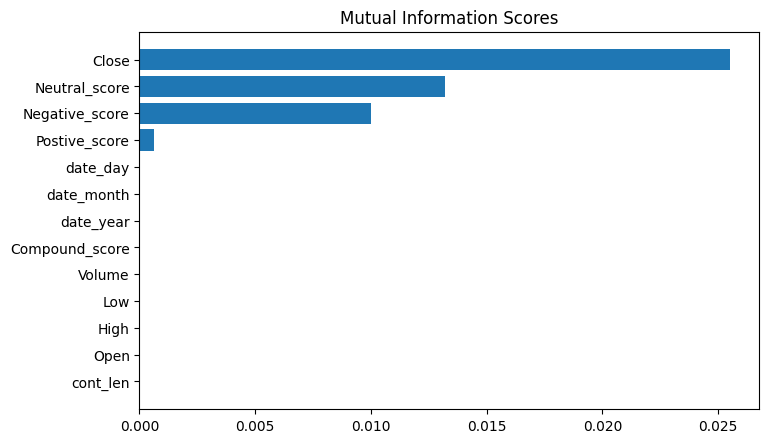

In [97]:
#Plotting to see the mutual information better
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Thus we can see that the columns that are highly correlated to the target variable by pearson correlation and mutual information analysis are
i. Volume
ii. Opening Price
iii. Closing price
iv. Comment Length
v. Day the comment is posted
vi. Content Polarity

In [99]:
#Therefore we drop the other columns
merge.drop(['High','Low'],axis=1,inplace=True)

# Now we do EDA

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\911835823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge.corr(),cmap='Blues',annot=True)


<AxesSubplot:>

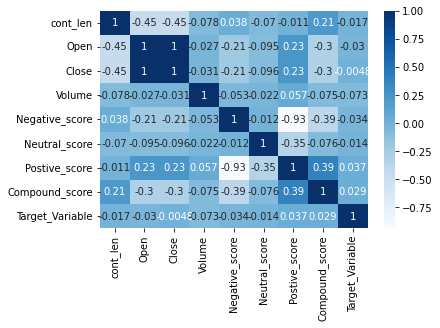

In [100]:
#We plot aheatmap using multiple columns
import seaborn as sns
sns.heatmap(merge.corr(),cmap='Blues',annot=True)

In [109]:
#For further eda we see the relationship between the sentiment and target
X1=merge.copy()
X1["Sentiment"]=0
X1.head()

,cont_len,Open,Close,Volume,Negative_score,Neutral_score,Postive_score,Compound_score,date_year,date_month,date_day,Target_Variable,Sentiment
0,92.000000,1358.979980,1368.709961,3743040000,0.0,0.0,1.0,0.075000,2012,04,11,1.0,0
1,90.642857,1368.770020,1387.569946,3618280000,0.0,0.0,1.0,0.021461,2012,04,12,1.0,0
2,83.000000,1387.609985,1370.260010,3631160000,0.0,1.0,0.0,0.000000,2012,04,13,0.0,0
3,214.263158,1369.569946,1390.780029,3456200000,0.0,0.0,1.0,0.124503,2012,04,17,1.0,0
4,85.000000,1385.079956,1376.920044,4180020000,1.0,0.0,0.0,-0.200000,2012,04,19,0.0,0


In [110]:
for ind in X1.index:
    polarity=X1['Compound_score'][ind]
    if polarity <0:
        X1['Sentiment'][ind]='Negative'
    elif polarity >0:
        X1['Sentiment'][ind]='Positive'
    else:
        X1['Sentiment'][ind]='Neutral'

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\2037688515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Sentiment'][ind]='Positive'


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

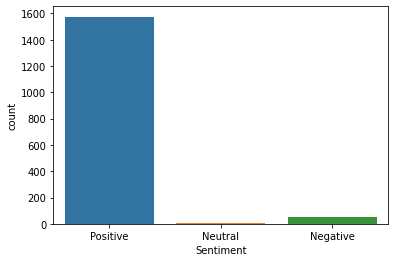

In [116]:
#Count plot of Sentiments
sns.countplot(x ='Sentiment',data = X1)

<AxesSubplot:xlabel='Target_Variable', ylabel='count'>

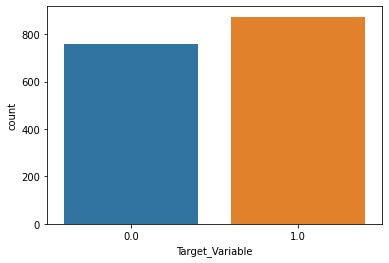

In [117]:
#Count plot of Target variable
sns.countplot(x ='Target_Variable',data = X1)

C:\Users\aiman\AppData\Local\Temp\ipykernel_11864\992435133.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1['cont_len'], kde = False, color ='red', bins = 30)


<AxesSubplot:xlabel='cont_len'>

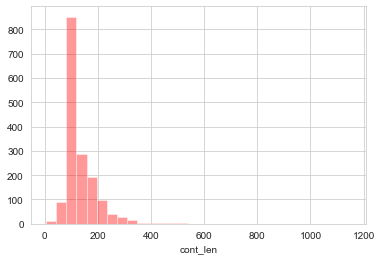

In [119]:
#Dist plot of comment length
sns.set_style('whitegrid')
sns.distplot(X1['cont_len'], kde = False, color ='red', bins = 30)

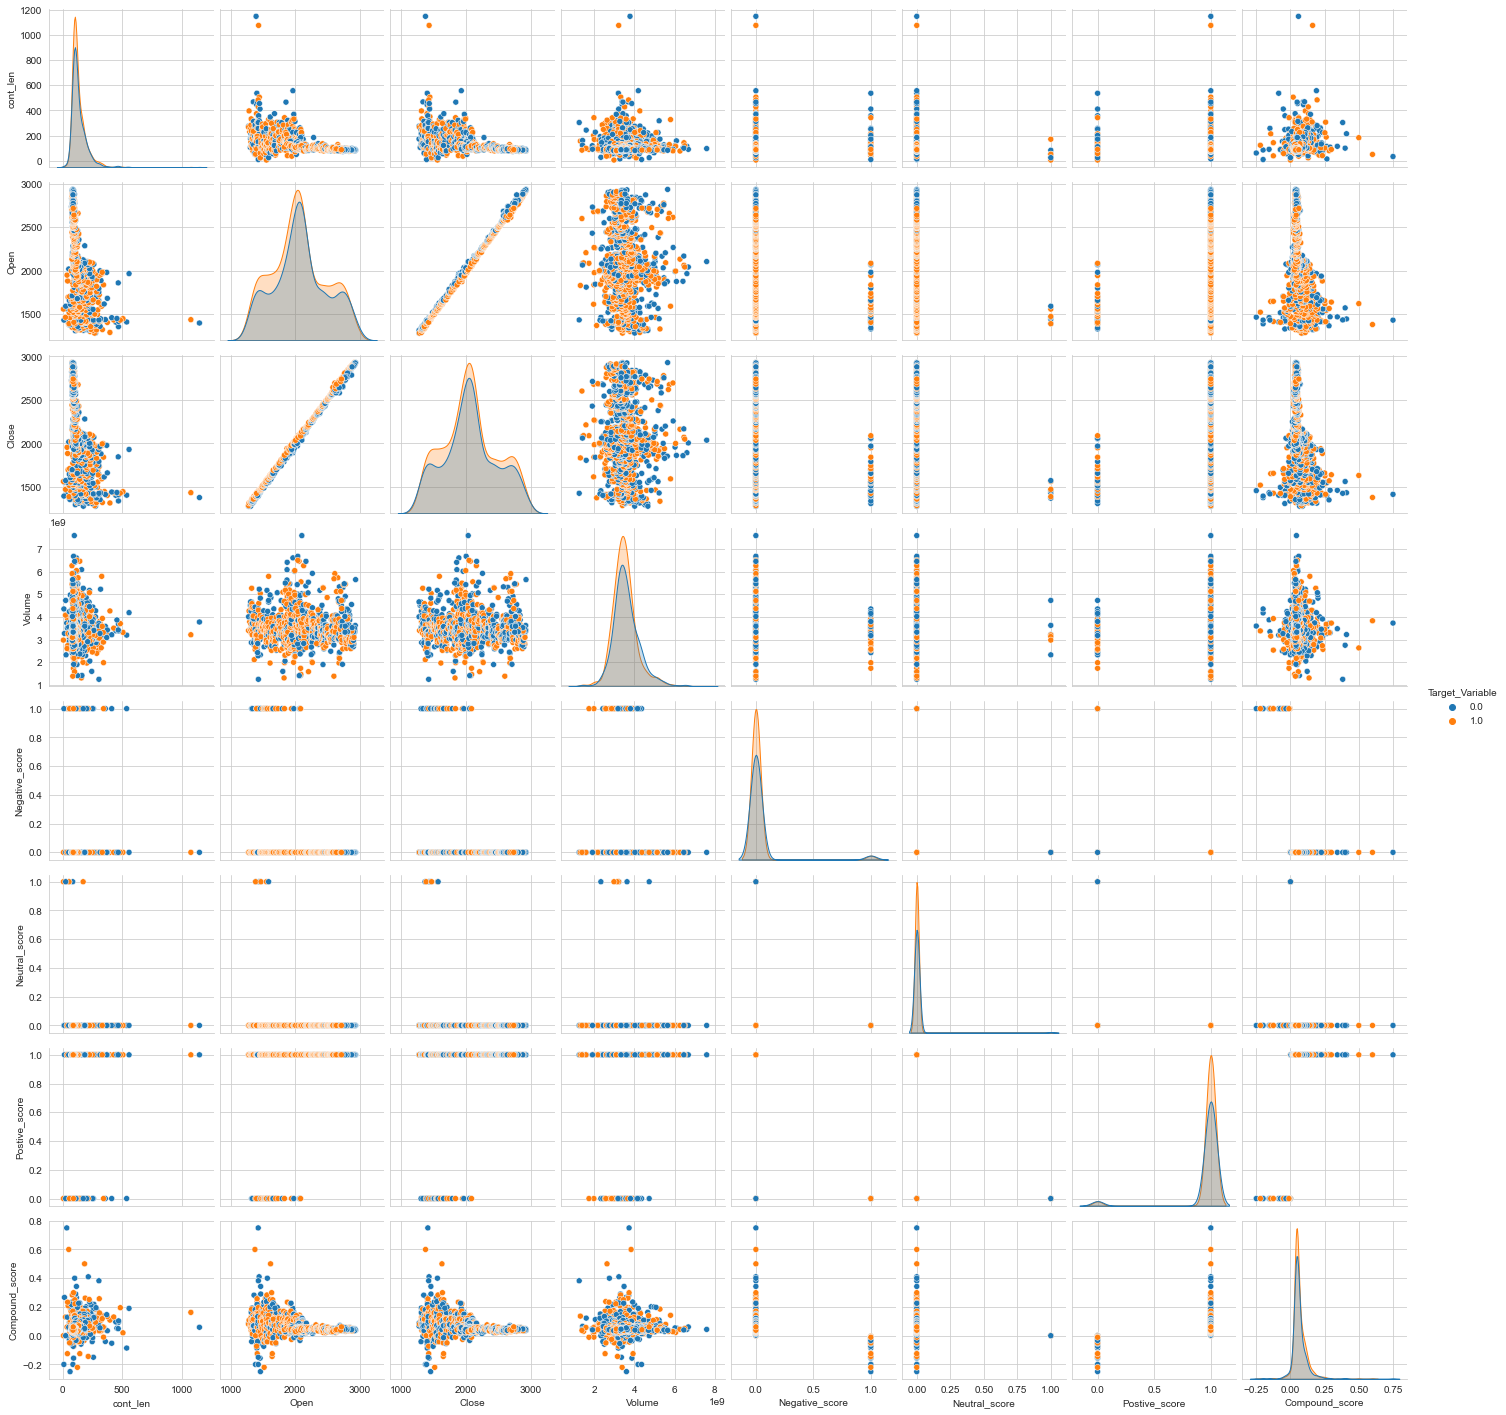

In [121]:
#Pairplot 
sns.pairplot(X1, hue ='Target_Variable')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c58c59dcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c58c580370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c58c59da60>],
 'medians': [<matplotlib.lines.Line2D at 0x1c58c580850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c58c580b20>],
 'means': []}

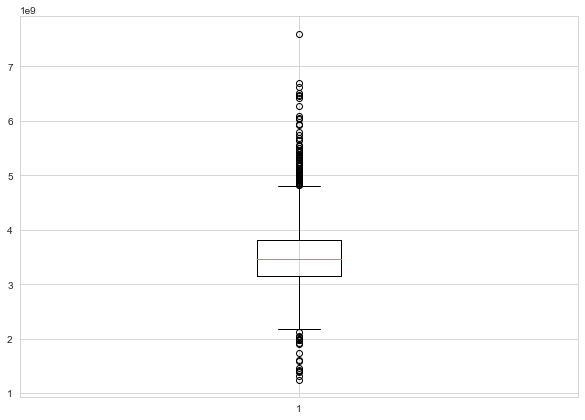

In [122]:
#Creating a boxplot for outlier detection
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X1['Volume'])

(array([0, 1, 2]),
 [Text(0, 0, 'Positive'), Text(1, 0, 'Neutral'), Text(2, 0, 'Negative')])

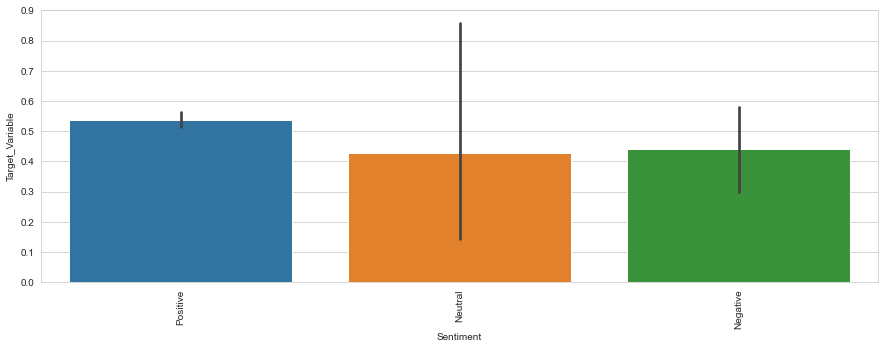

In [123]:
#Bivariate Analysis
plt.figure(figsize=(15, 5))
sns.barplot(x=X1['Sentiment'], y=X1['Target_Variable'])
plt.xticks(rotation='90')